# CO543 - Image Processing
## Lab 04

- E/19/129
- K. H. Gunawardana


In [3]:
import os
from google.colab import drive

path = "/content/drive/My Drive/ML/CO543/lab04/"

# Mount Google Drive
drive.mount('/content/drive')

import tensorflow as tf
%tensorflow_version 2.x
resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print('TPU initialized')

Mounted at /content/drive
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


TPU initialized


In [4]:
# import modules
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
def showImg(I, name="Image"):
    plt.figure(figsize=(10, 8))
    if len(I.shape) == 2:
        plt.imshow(I, cmap='gray')
    else:
        plt.imshow(I)

    plt.title(name)
    plt.show()

def show2Img(A, B, title=None, A_name="Original Image", B_name="Output Image"):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))

    if len(A.shape) == 2:
        ax1.imshow(A, cmap='gray')
    else:
        ax1.imshow(A)
    ax1.set_title(A_name)

    if len(B.shape) == 2:
        ax2.imshow(B, cmap='gray')
    else:
        ax2.imshow(B)
    ax2.set_title(B_name)

    plt.show()

def viewImg(A):
    cv2.imshow('image',A)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

#### Using K-means algorithm Identify the different clusters of MNIST Handwritten Digits

In [6]:
# Load the dataset
mnist = pd.read_csv(path + 'train.csv')

# Separate features and labels
X = mnist.drop('label', axis=1).values
y = mnist['label'].values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensionality with PCA to visualize in 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [7]:
mnist

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
y

array([1, 0, 1, ..., 7, 6, 9])

In [10]:
X_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
X_pca

array([[-5.14051791, -5.22694407],
       [19.2922737 ,  6.03244562],
       [-7.64447946, -1.70556164],
       ...,
       [ 0.49538078,  7.07614229],
       [ 2.30724544, -4.34417698],
       [-4.80773975,  1.55871105]])

In [22]:
for i in range(4, 18, 2):
    print(i)

4
6
8
10
12
14
16


In [ ]:
from concurrent.futures import ThreadPoolExecutor
import multiprocessing

# Function to compute WCSS for a given number of clusters
def compute_wcss(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    return kmeans.inertia_

# Function to compute silhouette score for a given number of clusters
def compute_silhouette_score(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    return silhouette_score(X_scaled, kmeans.labels_)

print(multiprocessing.cpu_count())

# Use ThreadPoolExecutor to parallelize computations
with ThreadPoolExecutor(max_workers=multiprocessing.cpu_count()) as executor:
    wcss = list(executor.map(compute_wcss, range(4, 24, 2)))
    silhouette_scores = list(executor.map(compute_silhouette_score, range(4, 24, 2)))

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(4, 24, 2), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(4, 24, 2), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
# Applying K-Means with the chosen number of clusters
optimal_clusters = 10
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
mnist['cluster'] = y_kmeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


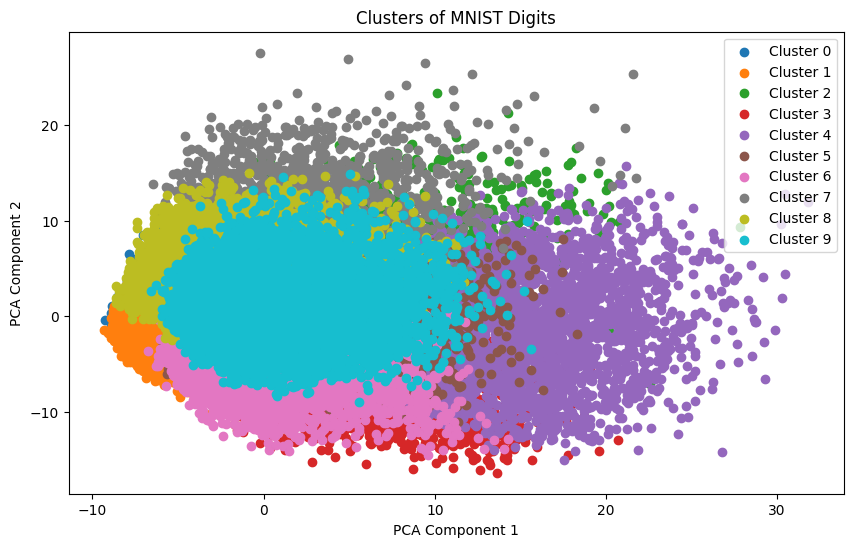

In [14]:
# Visualize the clusters using the PCA reduced data
plt.figure(figsize=(10, 6))
for i in range(optimal_clusters):
    plt.scatter(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1], label=f'Cluster {i}')

plt.title('Clusters of MNIST Digits')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [26]:
# Investigate misclustered images
misclustered_examples = []
for i in range(optimal_clusters):
    cluster_indices = np.where(y_kmeans == i)[0]
    true_labels = y[cluster_indices]
    most_common_label = np.bincount(true_labels).argmax()
    print(most_common_label)
    misclustered = cluster_indices[true_labels != most_common_label]
    if len(misclustered) > 0:
        misclustered_examples.append((i, misclustered, cluster_indices))

# Display misclustered images
for cluster, indices, cluster_indices in misclustered_examples:
    print(f"Cluster {cluster} has misclustered images: {len(indices)} out of {len(cluster_indices)}")


7
1
2
2
0
6
5
7
4
3
Cluster 0 has misclustered images: 1885 out of 4316
Cluster 1 has misclustered images: 3018 out of 7564
Cluster 2 has misclustered images: 1024 out of 2402
Cluster 3 has misclustered images: 1155 out of 2183
Cluster 4 has misclustered images: 321 out of 2632
Cluster 5 has misclustered images: 1048 out of 4248
Cluster 6 has misclustered images: 2877 out of 4476
Cluster 7 has misclustered images: 763 out of 1294
Cluster 8 has misclustered images: 3693 out of 6083
Cluster 9 has misclustered images: 4319 out of 6802
